In [1]:
import numpy as np
from nolds.measures import corr_dim
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Correlation Dimension

Logic: We measure correlation integral $C(\epsilon)$, namely, fraction of all inter-point distances that are smaller than $\epsilon$. According to some theorem, in the limit $N\rightarrow \infty$, $C(\epsilon) \sim \epsilon^D$, where $D$ is called the correlation dimension. Since the proportionality constant is not known, the suggested procedure is to compute $C(\epsilon)$ for multiple different values of $\epsilon$ and then fit a line to the log-log plot. 

**Problems**:
* At least empirically, $C(\epsilon)$ does not seem to follow the asymptotic distribution, even for large $N$. Have a look at the publication. This whole analysis rests on the pre-factor being independent of $\epsilon$. Is this really true?
* Naive implementation seems to underestimate full-rank phase-space dimensions by a factor of ~2, gets worse in higher dimensions.
* Imported library reports very weird numbers, like 0.01 and generally behaves badly.
* Is anything known about stability and practical usefulness of the metric?

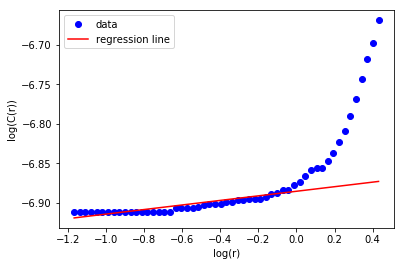

0.02885841013782631

In [2]:
aaa = np.random.normal(0, 3, 1000)

corr_dim(aaa, emb_dim=5, debug_plot=True)

In [33]:
# Return lower triangular part of the matrix as 1D array
def lower_1D(M):
    idxs = np.tril_indices(M.shape[0], -1)
    return M[idxs]

def get_diff(data2D):
    nPoint, nDim = data2D.shape
    
    rez = []
    for i in range(nPoint):
        tmp = np.linalg.norm(data2D - data2D[i], axis=1)
        rez += list(tmp[:i]) + list(tmp[i+1:])

    rez = np.array(rez)
    print(rez.shape)
    return rez

def corr_dim_homebrew(data2D, debugPlot=True):
    # 1. Get all pairwise distances
    nPoint, nDim = data2D.shape
    diff = get_diff(data2D)
    
#     data3D = np.repeat(data2D[..., None], nPoint, axis=2).transpose((0,2,1))
#     diff = lower_1D(np.linalg.norm(data3D - data3D.transpose((1,0,2)), axis=2))
    diffSorted = np.sort(diff)
    corrIntegral = np.arange(1, len(diff)+1) / nPoint**2

    diffSortedLog = np.log10(diffSorted)
    corrIntegralLog = np.log10(corrIntegral)
    coeff = np.polyfit(diffSortedLog[:1000], corrIntegralLog[:1000], 1)
    plin = lambda x, c: (x, c[1] + c[0]*x)
    
    if debugPlot:
        plt.figure()
        plt.plot(diffSortedLog, corrIntegralLog)
        plt.plot(*plin(diffSortedLog, coeff), 'r--' )
        plt.savefig('corrInt.svg')
        plt.show()
        
    return coeff[0]

(3998000,)


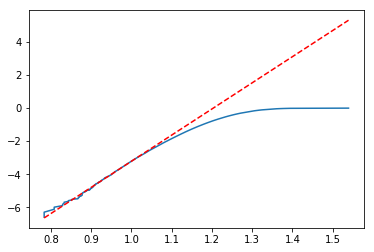

Estimated dimension 15.834451201526008


In [34]:
aaa = np.random.normal(0, 3, (2000, 20))
corrDim = corr_dim_homebrew(aaa)
print("Estimated dimension", corrDim)